In [1]:
import wandb
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import importlib
from common import common
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import fetch_covtype

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: suyee-tan21 (suyee-tan21-nus). Use `wandb login --relogin` to force relogin


True

In [3]:
# Reload common module
importlib.reload(common)

<module 'common.common' from '/Users/suyeetan/Downloads/CS5344_Project/work/common/common.py'>

In [4]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    seconds = time.time()
    # Train the model
    model.fit(X_train, y_train)
    print("Train operation time: = ",time.time()- seconds ,"seconds")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print model evaluation metrics
    return (common.evaluate(y_test, y_pred, f"\nModel: {model.__class__.__name__}"))

In [5]:
# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC()
}

In [6]:
%run datasets/unsw.ipynb

In [7]:
# Should already be one hot encoded and label encoded
all_df, main_labels, config = get_processed_unsw_df()
TARGET_COLUMN = config['TARGET_COLUMN']
NORMAL_TARGET = config['NORMAL_TARGET']
TARGET_DICT = config['TARGET_DICT']
INV_TARGET_DICT = config['INV_TARGET_DICT']
NUMERICAL_COLUMNS = config['NUMERICAL_COLUMNS']
CATEGORICAL_COLUMNS = config['CATEGORICAL_COLUMNS']
ORDINAL_COLUMNS = config['ORDINAL_COLUMNS']
all_df.head()

Normal class:  0    Normal
Name: attack_cat, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
TARGET_DICT {0: 'Analysis', 1: 'Backdoor', 2: 'DoS', 3: 'Exploits', 4: 'Fuzzers', 5: 'Generic', 6: 'Normal', 7: 'Reconnaissance', 8: 'Shellcode', 9: 'Worms'}
NORMAL_TARGET 6
main_labels Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
       'sloss', 'dloss',
       ...
       'service_ssl', 'state_CON', 'state_ECO', 'state_FIN', 'state_INT',
       'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no'],
      dtype='object', length=187)


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Get X and y from all_df
X_df = all_df.drop(columns=[TARGET_COLUMN])
y_df = all_df[TARGET_COLUMN]

# Split the data into training and testing sets (80% train, 20% test)
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(140272, 186) (35069, 186) (140272,) (35069,)


In [9]:
# Fit and transform the numeric columns
scaler, X_train_scaled_df = common.standardise(X_train_df, NUMERICAL_COLUMNS)
# print('X_train_scaled_df', X_train_scaled_df)

# Use the same scaler to transform X_test
scaler, X_test_scaled_df = common.standardise(X_test_df, NUMERICAL_COLUMNS, scaler=scaler)
# print('X_test_scaled_df', X_test_scaled_df)

Train operation time: =  40.98123788833618 seconds

Model: LogisticRegression
Confusion Matrix:
[[  25    0    3  338    2    0   25    0    0    0]
 [   0    1    6  305   16    0   12   20    0    0]
 [   0    0   32 2139   75   16   66   42    0    0]
 [   1    2   83 5686  334   18  383  265    0    0]
 [   0    0    2  437 2322    0  494  315    0    0]
 [   0    0    2  135   32 7886   18    6    0    0]
 [  12    0    4  284 1571    9 9085  204    0    0]
 [   0    0    9  505  208    7   34 1335    0    0]
 [   0    0    0    0  113    0    5  115    0    0]
 [   0    0    0   21    2    0    0    2    0    0]]


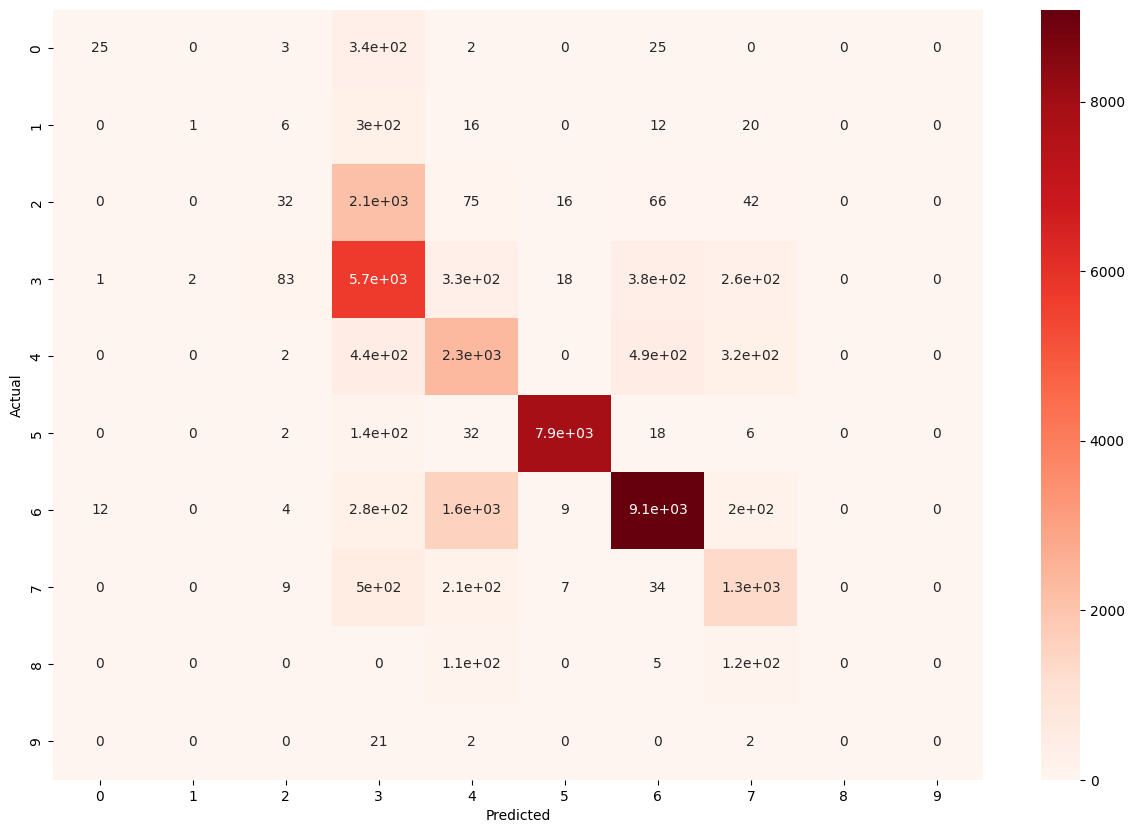

/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Classification Report:
{'0': {'precision': 0.6578947368421053, 'recall': 0.06361323155216285, 'f1-score': 0.11600928074245939, 'support': 393.0}, '1': {'precision': 0.3333333333333333, 'recall': 0.002777777777777778, 'f1-score': 0.005509641873278237, 'support': 360.0}, '2': {'precision': 0.22695035460992907, 'recall': 0.01350210970464135, 'f1-score': 0.025487853444842692, 'support': 2370.0}, '3': {'precision': 0.577258883248731, 'recall': 0.8396337861783816, 'f1-score': 0.6841535314643243, 'support': 6772.0}, '4': {'precision': 0.49668449197860964, 'recall': 0.6504201680672269, 'f1-score': 0.5632504548211037, 'support': 3570.0}, '5': {'precision': 0.9936995967741935, 'recall': 0.9761109048149523, 'f1-score': 0.9848267249453637, 'support': 8079.0}, '6': {'precision': 0.897549891325825, 'recall': 0.8134121228400035, 'f1-score': 0.8534122399135785, 'support': 11169.0}, '7': {'precision': 0.5794270833333334, 'recall': 0.6363203050524309, 'f1-score': 0.6065424806905951, 'support': 2098.0},

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.752
f1-score_avg,0.7275
precision_avg,0.73761
recall_avg,0.752


Train operation time: =  2.2015328407287598 seconds

Model: DecisionTreeClassifier
Confusion Matrix:
[[   67     5    51   235     0     1    34     0     0     0]
 [    2    44    46   259     2     0     2     2     2     1]
 [    3     1   404  1879    23     6    33    14     7     0]
 [    8    19   780  5543    83    37   111   157    24    10]
 [    8     5    73   319  2409     5   715     2    33     1]
 [    0     2    35    93    12  7929     6     0     1     1]
 [   36     3    24   135   822     9 10098    14    28     0]
 [    0     5    81   435     2     1    12  1557     4     1]
 [    0     1    13    24    46     1    28     2   118     0]
 [    0     0     1    11     1     0     0     1     0    11]]


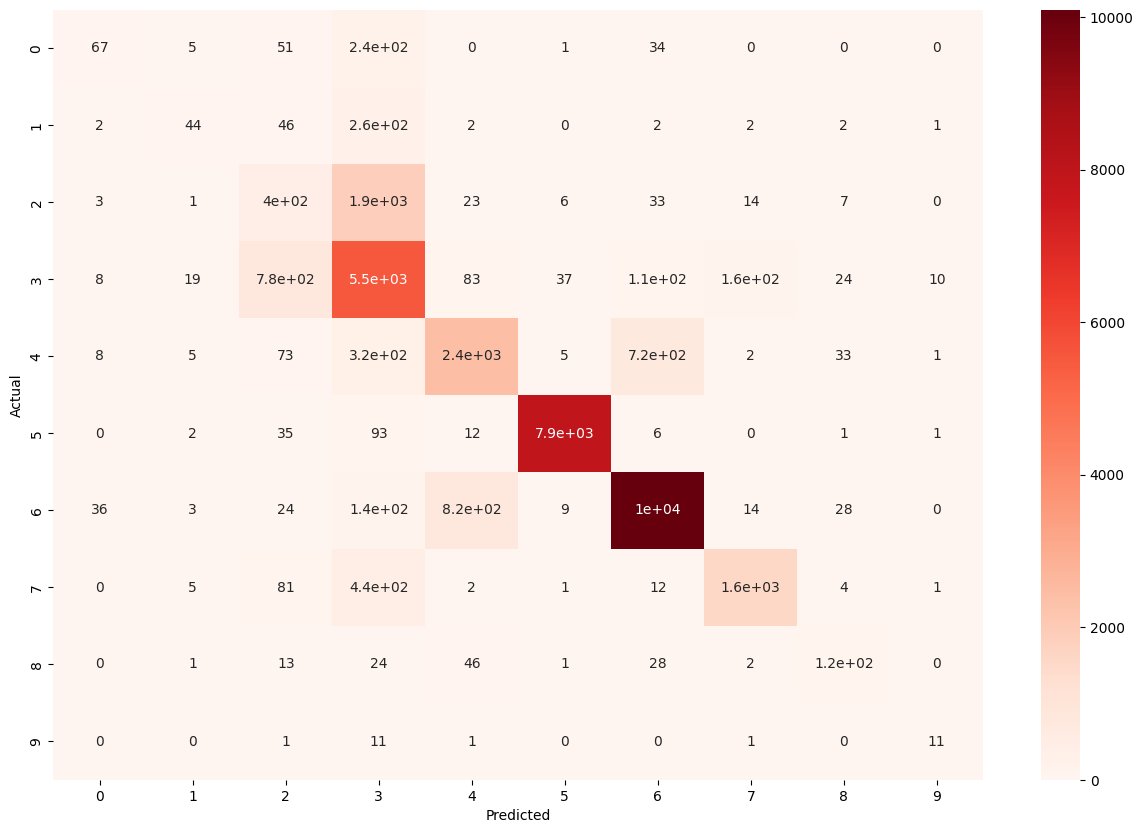


Classification Report:
{'0': {'precision': 0.5403225806451613, 'recall': 0.17048346055979643, 'f1-score': 0.25918762088974856, 'support': 393.0}, '1': {'precision': 0.5176470588235295, 'recall': 0.12222222222222222, 'f1-score': 0.19775280898876405, 'support': 360.0}, '2': {'precision': 0.26790450928381965, 'recall': 0.17046413502109706, 'f1-score': 0.20835482207323364, 'support': 2370.0}, '3': {'precision': 0.6205082279189522, 'recall': 0.8185174246898996, 'f1-score': 0.7058898439987266, 'support': 6772.0}, '4': {'precision': 0.7085294117647059, 'recall': 0.6747899159663866, 'f1-score': 0.6912482065997131, 'support': 3570.0}, '5': {'precision': 0.9924896733007886, 'recall': 0.9814333457111029, 'f1-score': 0.9869305451829724, 'support': 8079.0}, '6': {'precision': 0.914756771446689, 'recall': 0.9041095890410958, 'f1-score': 0.9094020172910663, 'support': 11169.0}, '7': {'precision': 0.8902229845626072, 'recall': 0.7421353670162059, 'f1-score': 0.8094619183779569, 'support': 2098.0}, '8

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.80356
f1-score_avg,0.79491
precision_avg,0.79859
recall_avg,0.80356


Train operation time: =  15.203802824020386 seconds

Model: RandomForestClassifier
Confusion Matrix:
[[   54     3    42   248     2     0    44     0     0     0]
 [    2    38    41   267     4     0     2     4     2     0]
 [    3     3   311  1972    34     0    22    17     8     0]
 [    3     0   510  5921   100     5    92   123    18     0]
 [    5     3    52   312  2610     6   552     2    28     0]
 [    0     1    24   137    16  7895     4     0     0     2]
 [    5     1     3   105   824     0 10208    15     7     1]
 [    0     2    73   448     2     0     3  1570     0     0]
 [    0     0     6    23    62     2    40     3    97     0]
 [    0     0     0    23     1     0     0     0     0     1]]


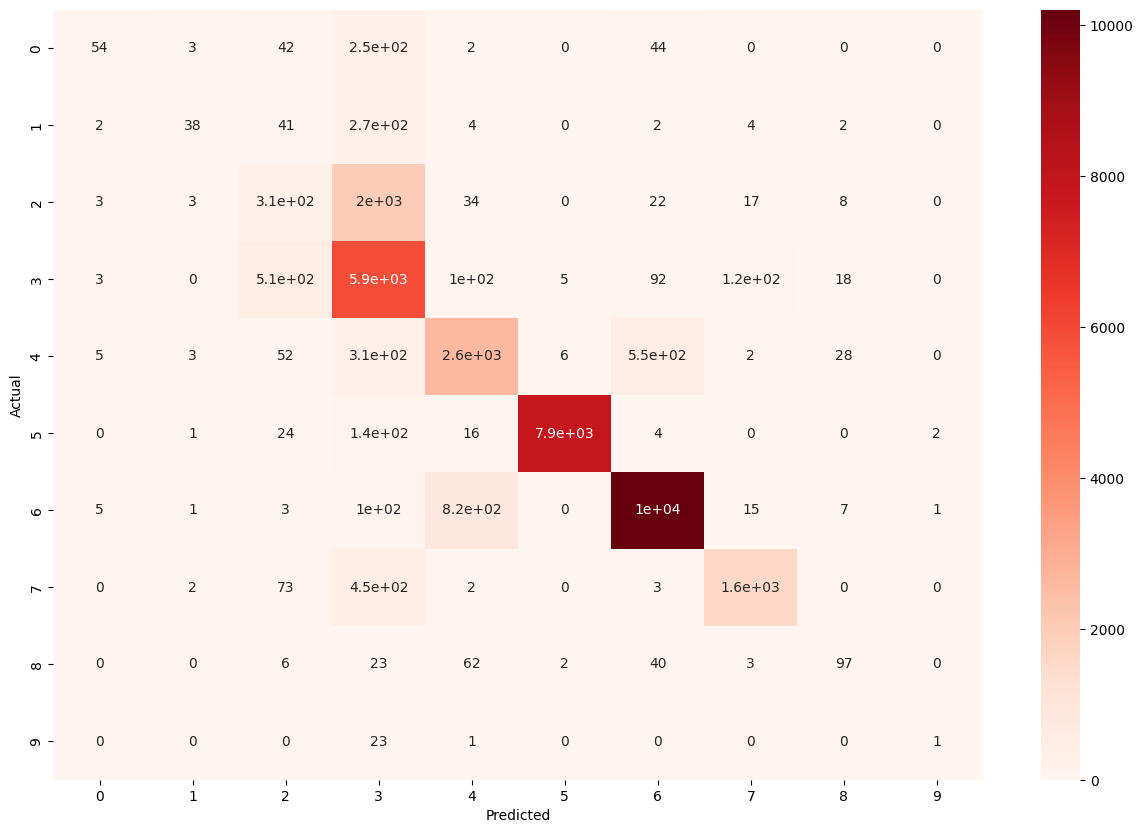


Classification Report:
{'0': {'precision': 0.75, 'recall': 0.13740458015267176, 'f1-score': 0.23225806451612904, 'support': 393.0}, '1': {'precision': 0.7450980392156863, 'recall': 0.10555555555555556, 'f1-score': 0.18491484184914841, 'support': 360.0}, '2': {'precision': 0.2928436911487759, 'recall': 0.13122362869198312, 'f1-score': 0.18123543123543123, 'support': 2370.0}, '3': {'precision': 0.626163282571912, 'recall': 0.8743354991139988, 'f1-score': 0.7297263988168597, 'support': 6772.0}, '4': {'precision': 0.7140902872777017, 'recall': 0.7310924369747899, 'f1-score': 0.7224913494809688, 'support': 3570.0}, '5': {'precision': 0.9983560950935761, 'recall': 0.9772249040722861, 'f1-score': 0.9876774879589667, 'support': 8079.0}, '6': {'precision': 0.9307923771313942, 'recall': 0.9139582773748769, 'f1-score': 0.9222985182508131, 'support': 11169.0}, '7': {'precision': 0.9054209919261822, 'recall': 0.7483317445185891, 'f1-score': 0.8194154488517745, 'support': 2098.0}, '8': {'precision'

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.81853
f1-score_avg,0.80484
precision_avg,0.81427
recall_avg,0.81853


Train operation time: =  458.359121799469 seconds

Model: GradientBoostingClassifier
Confusion Matrix:
[[  48    0    2  309    0    0   34    0    0    0]
 [   0   30    0  314    7    0    1    4    2    2]
 [   0    1   42 2196   45    0   53   23   10    0]
 [   2    2   28 6183  230   10  154  139   17    7]
 [   5    0    5  357 2631    1  523   12   36    0]
 [   0    1    3  137   30 7899    6    0    1    2]
 [  14    0    2  158 1058    0 9913   20    4    0]
 [   0    2    4  503    3    0    2 1582    2    0]
 [   0    0    0    7   75    0   30    9  112    0]
 [   0    0    0   11    2    0    1    0    0   11]]


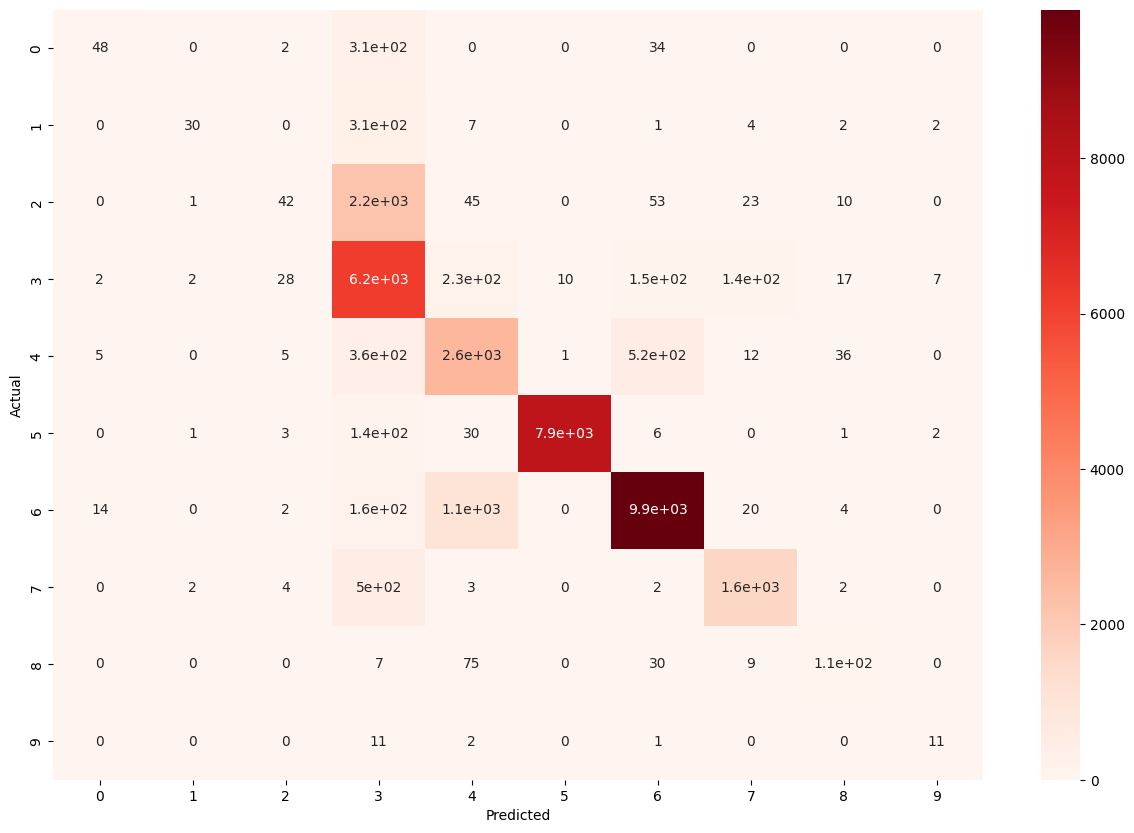


Classification Report:
{'0': {'precision': 0.6956521739130435, 'recall': 0.12213740458015267, 'f1-score': 0.2077922077922078, 'support': 393.0}, '1': {'precision': 0.8333333333333334, 'recall': 0.08333333333333333, 'f1-score': 0.15151515151515152, 'support': 360.0}, '2': {'precision': 0.4883720930232558, 'recall': 0.017721518987341773, 'f1-score': 0.03420195439739414, 'support': 2370.0}, '3': {'precision': 0.6076658476658476, 'recall': 0.9130242173656231, 'f1-score': 0.7296866702071163, 'support': 6772.0}, '4': {'precision': 0.6446949277137957, 'recall': 0.7369747899159664, 'f1-score': 0.6877532348712586, 'support': 3570.0}, '5': {'precision': 0.9986093552465234, 'recall': 0.9777200148533234, 'f1-score': 0.9880542873225342, 'support': 8079.0}, '6': {'precision': 0.9249790053186526, 'recall': 0.8875458859342824, 'f1-score': 0.9058759024033629, 'support': 11169.0}, '7': {'precision': 0.8842929010620458, 'recall': 0.7540514775977121, 'f1-score': 0.8139953691793157, 'support': 2098.0}, '8

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.81129
f1-score_avg,0.78585
precision_avg,0.81428
recall_avg,0.81129


Train operation time: =  0.2614760398864746 seconds

Model: KNeighborsClassifier
Confusion Matrix:
[[  27    2   98  221   20    0   22    3    0    0]
 [   3    2  119  210   14    0   11    1    0    0]
 [   5   12  807 1330   72    1  114   25    4    0]
 [  51   32 1153 3845  759    1  794  131    6    0]
 [  21    7  180 1424 1214    3  623   69   27    2]
 [   1    0   35   98   33 7884   23    5    0    0]
 [  26    9   71 1382  726    3 8883   59    9    1]
 [   6    5  191  756  168    2  213  752    4    1]
 [   4    1   18   56   76    2   35   10   31    0]
 [   0    0    1   16    3    0    5    0    0    0]]


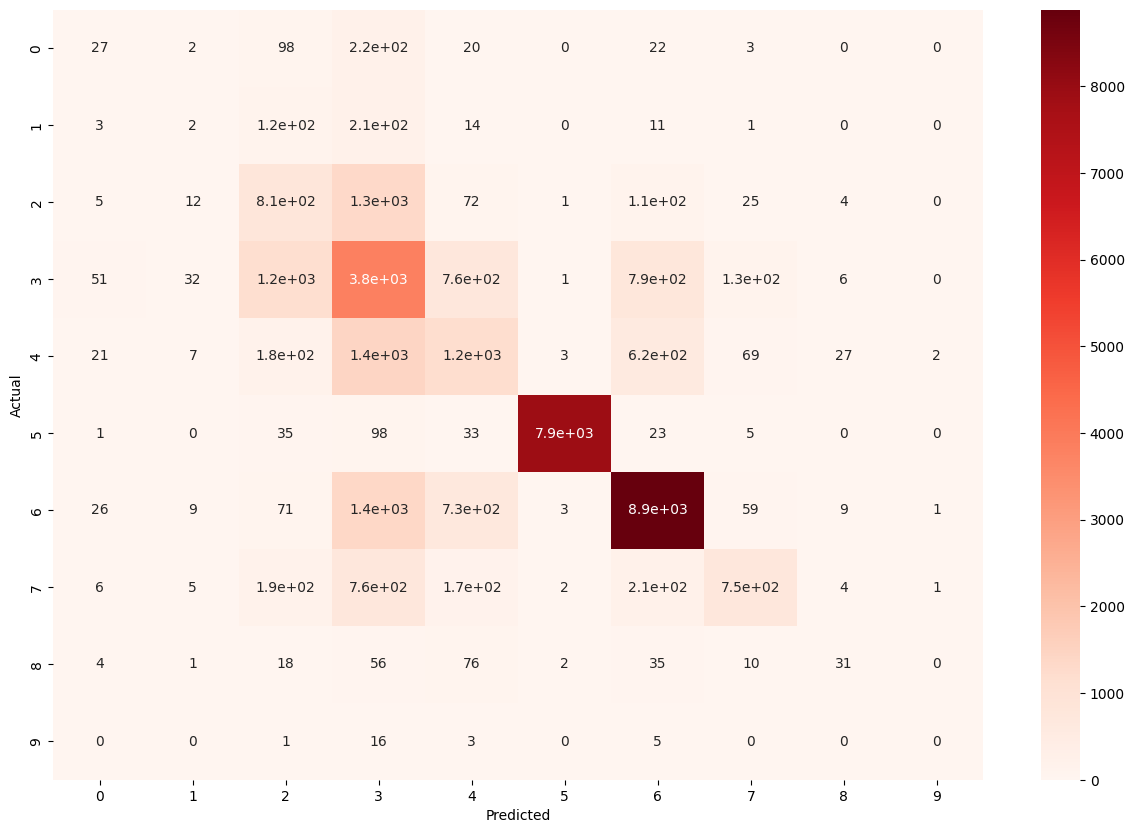


Classification Report:
{'0': {'precision': 0.1875, 'recall': 0.06870229007633588, 'f1-score': 0.1005586592178771, 'support': 393.0}, '1': {'precision': 0.02857142857142857, 'recall': 0.005555555555555556, 'f1-score': 0.009302325581395349, 'support': 360.0}, '2': {'precision': 0.30190796857463525, 'recall': 0.34050632911392403, 'f1-score': 0.32004759071980965, 'support': 2370.0}, '3': {'precision': 0.4117584065110302, 'recall': 0.5677790903721205, 'f1-score': 0.47734326505276226, 'support': 6772.0}, '4': {'precision': 0.393517017828201, 'recall': 0.3400560224089636, 'f1-score': 0.36483846731780617, 'support': 3570.0}, '5': {'precision': 0.9984802431610942, 'recall': 0.9758633494244338, 'f1-score': 0.9870422535211267, 'support': 8079.0}, '6': {'precision': 0.8284062295999254, 'recall': 0.7953263497179693, 'f1-score': 0.8115293257811073, 'support': 11169.0}, '7': {'precision': 0.7127962085308057, 'recall': 0.35843660629170637, 'f1-score': 0.4770060260069775, 'support': 2098.0}, '8': {'pr

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.66854
f1-score_avg,0.66787
precision_avg,0.68142
recall_avg,0.66854


Train operation time: =  1365.8423941135406 seconds

Model: SVC
Confusion Matrix:
[[  26    0    0  336    1    0   30    0    0    0]
 [   0    0    0  316   28    0    5   11    0    0]
 [   0    0   18 2197   96   13   18   28    0    0]
 [   1    0    4 6218  429   18   68   34    0    0]
 [   1    0    0  429 2796    0   80  264    0    0]
 [   0    0    3  145   42 7884    0    5    0    0]
 [  10    0    0  237 1813    8 8969  132    0    0]
 [   0    0    1  675  334    3    9 1076    0    0]
 [   0    0    0    0  144    0    0   89    0    0]
 [   0    0    1   21    2    0    0    1    0    0]]


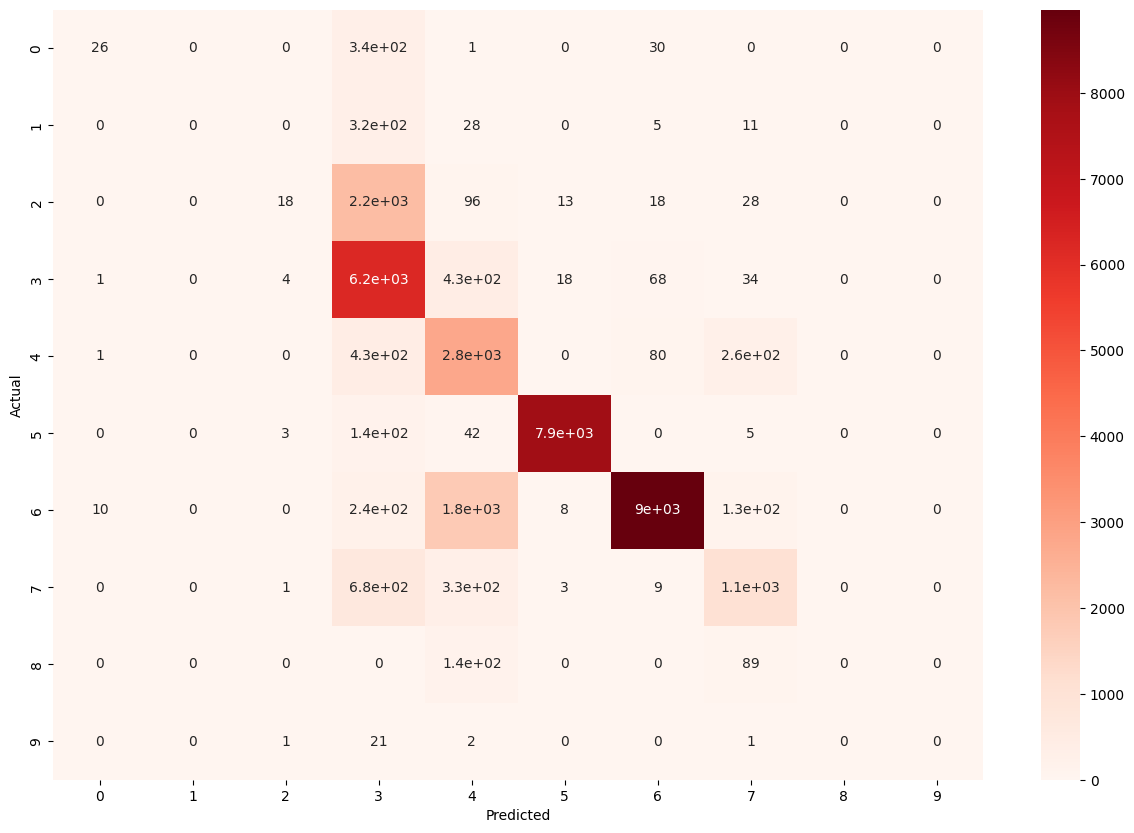

/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Classification Report:
{'0': {'precision': 0.6842105263157895, 'recall': 0.06615776081424936, 'f1-score': 0.12064965197215777, 'support': 393.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 360.0}, '2': {'precision': 0.6666666666666666, 'recall': 0.007594936708860759, 'f1-score': 0.015018773466833541, 'support': 2370.0}, '3': {'precision': 0.5880461509362588, 'recall': 0.9181925575900768, 'f1-score': 0.7169376225066297, 'support': 6772.0}, '4': {'precision': 0.49182058047493404, 'recall': 0.7831932773109244, 'f1-score': 0.6042139384116694, 'support': 3570.0}, '5': {'precision': 0.9947009841029523, 'recall': 0.9758633494244338, 'f1-score': 0.9851921274601687, 'support': 8079.0}, '6': {'precision': 0.977121690815993, 'recall': 0.80302623332438, 'f1-score': 0.8815608413603303, 'support': 11169.0}, '7': {'precision': 0.6560975609756098, 'recall': 0.5128693994280267, 'f1-score': 0.5757089352594971, 'support': 2098.0}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score'

Accuracy Score,▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.76954
f1-score_avg,0.74449
precision_avg,0.79595
recall_avg,0.76954


In [10]:
# Loop through models and evaluate each one
for model_name, model in models.items():
    wandb.init(project="ML-model-baselines-unsw-dataset", name=model_name)
    
    # For SVM and Logistic Regression, use scaled data
    if model_name in ["Logistic Regression", "Support Vector Machine (SVM)"]:
        conf_matrix, class_report, acc_score = evaluate_model(model, X_train_scaled_df, y_train_df, X_test_scaled_df, y_test_df)
        common.wandb_log(conf_matrix, class_report, acc_score)
    else:
        conf_matrix, class_report, acc_score = evaluate_model(model, X_train_df, y_train_df, X_test_df, y_test_df)
        common.wandb_log(conf_matrix, class_report, acc_score)
        
    wandb.finish()

In [11]:
wandb.finish()